In [15]:
import pandas as pd

trainingSet = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/train.csv")
testingSet = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/test.csv")

In [2]:
trainingSet.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,1.697533e+06,1.697533e+06,1.697533e+06,1.397533e+06,1.697533e+06
mean,8.487660e+05,3.569048e+00,5.301422e+00,4.111468e+00,1.262422e+09
std,4.900357e+05,1.727883e+01,2.024445e+01,1.196808e+00,1.289277e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.793792e+08
25%,4.243830e+05,0.000000e+00,0.000000e+00,4.000000e+00,1.164413e+09
50%,8.487660e+05,1.000000e+00,1.000000e+00,5.000000e+00,1.307491e+09
75%,1.273149e+06,3.000000e+00,5.000000e+00,5.000000e+00,1.373242e+09
max,1.697532e+06,6.084000e+03,6.510000e+03,5.000000e+00,1.406074e+09


In [3]:
testingSet.describe()

,Id,Score
count,3.000000e+05,0.0
mean,8.476586e+05,NaN
std,4.892773e+05,NaN
min,5.000000e+00,NaN
25%,4.234080e+05,NaN
50%,8.467925e+05,NaN
75%,1.271034e+06,NaN
max,1.697528e+06,NaN


In [47]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score,Predicted_Score
1134943,1134943,B00125WAWI,A10NM4PC3209XU,2,3,3.0,1319155200,"A little entertaining, but director held back ...",The love story between the two gals is simply ...,-0.045837,4.0
682603,682603,B00005U0JX,A1JH5J1KQAUBMP,2,2,5.0,1081036800,Exhilerating,As the result of a wager between native hothea...,0.244415,1.0
1180647,1180647,B001DHXT1G,A1RSXP7MB772E3,0,0,4.0,1224806400,"Enjoyable, with good characters and exotic loc...",The Hulk is more visceral that any other Comic...,0.394650,1.0
1205329,1205329,B001J66JQS,A28IP5K9LFL7AV,0,0,5.0,1358640000,great dvd,Love Max Gerson's work and great to see his fa...,0.129032,4.0
1168057,1168057,B001ARDBXK,A4YP8C4QHU2I1,0,0,4.0,1367020800,Charlie Chan fan,Thanks for this addition to mywith Sidney Tole...,0.090909,4.0


In [3]:
import matplotlib.pyplot as plt

In [9]:
trainingSet['Score'].value_counts()

5.0    746520
4.0    315587
3.0    165727
1.0     85615
2.0     84084
Name: Score, dtype: int64

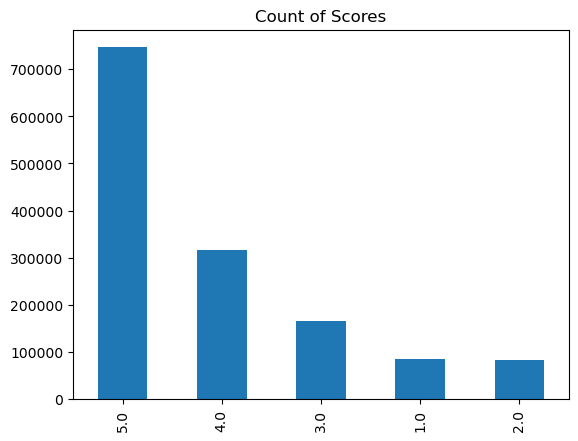

In [7]:
trainingSet['Score'].value_counts().plot(kind='bar')
plt.title("Count of Scores")
plt.show()

In [44]:
trainingSet['ProductId'].value_counts().head()

B001KVZ6HK    22
B003EYVXV4    20
0793906091    19
B00003CWT6    18
B00FZM8Z7I    18
Name: ProductId, dtype: int64

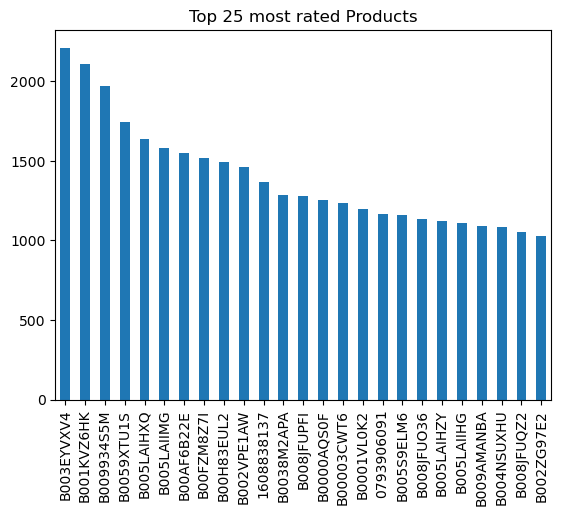

In [10]:
trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar')
plt.title("Top 25 most rated Products")
plt.show()

In [ ]:
trainingSet['ProductId'].value_counts().nlargest(25)

KMeans Cluster
If helpfulness numerator is high then it is likely a 5


# Calculate Sentiment Score Using NLTK Library

In [16]:
# Shuffle dataframe 
trainingSet = trainingSet.sample(frac=1, random_state=1)
testingSet = testingSet.sample(frac=1, random_state=1)


# Use 1% of the data right now because dataset is too large
trainingSet = trainingSet[: int(0.01 * len(trainingSet))] 
testingSet = testingSet[: int(0.01 * len(testingSet))]

In [17]:
trainingSet['Text'] = trainingSet['Text'].astype(str)
scores = list(trainingSet['Score'])
reviews = list(trainingSet['Text'])

In [18]:
print(scores[0])
print(reviews[0])

3.0
The love story between the two gals is simply not believable because there is nothing prior to their "awakening" that indicates either one of them was physically or emotionally attracted to the other. Was Nina a lesbian when she first appears on the screen? Was Lisa a lesbian coincidentally working in the restaurant? No clues given. The director (Parma) was ultimately timid about the subject and the first kiss between Nina and Lisa is delivered without spark and passion -- and if there's more to being a lesbian than just two women kissing, you won't find it with these characters. The story of two women destined to find an interest in each other beyond their attachment to the restaurant lacks evolution. Finally, the pseudo-Bollywood ending was not only out of place, but it made whatever came before it absurd.


In [21]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('opinion_lexicon') 

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/mzhen/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [22]:
def score_sent(sent):
    sent = [e.lower() for e in sent if e.isalnum()]
    total = len(sent)
    pos = len([e for e in sent if e in positive_words])
    neg = len([e for e in sent if e in negative_words])
    if total > 0:
        return (pos - neg) / total
    else:
        return 0

In [23]:
def score_review(review):
    sentiment_scores = []
    sents = sent_tokenize(review)
    for sent in sents:
        words = word_tokenize(sent)
        sent_scores = score_sent(words)
        sentiment_scores.append(sent_scores)
    return sum(sentiment_scores)

In [24]:
review_sentiments = [score_review(e) for e in reviews]

In [25]:
trainingSet['Sentiment_Score'] = review_sentiments

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

sents_scores = trainingSet['Sentiment_Score'].to_numpy()
sents_scores = sents_scores.reshape(-1, 1)
clusters = kmeans.fit_predict(sents_scores)

trainingSet['Predicted_Score'] = clusters.tolist()
trainingSet['Predicted_Score'] = trainingSet['Predicted_Score'] + 1.0

In [27]:
trainingSet['Predicted_Score'].head()

1134943    4.0
682603     1.0
1180647    1.0
1205329    4.0
1168057    4.0
Name: Predicted_Score, dtype: float64

In [28]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score,Predicted_Score
1134943,1134943,B00125WAWI,A10NM4PC3209XU,2,3,3.0,1319155200,"A little entertaining, but director held back ...",The love story between the two gals is simply ...,-0.045837,4.0
682603,682603,B00005U0JX,A1JH5J1KQAUBMP,2,2,5.0,1081036800,Exhilerating,As the result of a wager between native hothea...,0.244415,1.0
1180647,1180647,B001DHXT1G,A1RSXP7MB772E3,0,0,4.0,1224806400,"Enjoyable, with good characters and exotic loc...",The Hulk is more visceral that any other Comic...,0.394650,1.0
1205329,1205329,B001J66JQS,A28IP5K9LFL7AV,0,0,5.0,1358640000,great dvd,Love Max Gerson's work and great to see his fa...,0.129032,4.0
1168057,1168057,B001ARDBXK,A4YP8C4QHU2I1,0,0,4.0,1367020800,Charlie Chan fan,Thanks for this addition to mywith Sidney Tole...,0.090909,4.0


# Average Length of words 

In [49]:
trainingSet["Number of Words"] = trainingSet['Text'].apply(lambda x: len(x.split()))
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score,Predicted_Score,Number of Words
1134943,1134943,B00125WAWI,A10NM4PC3209XU,2,3,3.0,1319155200,"A little entertaining, but director held back ...",The love story between the two gals is simply ...,-0.045837,4.0,139
682603,682603,B00005U0JX,A1JH5J1KQAUBMP,2,2,5.0,1081036800,Exhilerating,As the result of a wager between native hothea...,0.244415,1.0,184
1180647,1180647,B001DHXT1G,A1RSXP7MB772E3,0,0,4.0,1224806400,"Enjoyable, with good characters and exotic loc...",The Hulk is more visceral that any other Comic...,0.394650,1.0,348
1205329,1205329,B001J66JQS,A28IP5K9LFL7AV,0,0,5.0,1358640000,great dvd,Love Max Gerson's work and great to see his fa...,0.129032,4.0,30
1168057,1168057,B001ARDBXK,A4YP8C4QHU2I1,0,0,4.0,1367020800,Charlie Chan fan,Thanks for this addition to mywith Sidney Tole...,0.090909,4.0,20


In [52]:
trainingSet["Number of Words"].mean()

159.31952871870396

# Find if Product is popular or not

In [82]:
import math
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
trainingSet['num_reviews'] = trainingSet.groupby('ProductId')['ProductId'].transform('count')

pop = trainingSet['num_reviews'].to_numpy()
pop = pop.reshape(-1, 1)
clusters = kmeans.fit_predict(pop)

trainingSet['Popularity'] = clusters.tolist()

In [77]:
trainingSet["Number of Words"] = trainingSet['Text'].astype(str).apply(lambda x: len(x.split()))

trainingSet['Review Length'] = trainingSet["Number of Words"].apply(lambda x: 1 if x > 150 else 0)


In [84]:
import numpy as np
#transform Helpfulness into a binary variable with 0.50 ratio
threshold = 0.5
trainingSet['Helpful'] = np.where(trainingSet.loc[:, 'HelpfulnessNumerator'] / trainingSet.loc[:, 'HelpfulnessDenominator'] > threshold, 1, 0)

In [ ]:
df = trainingSet.drop(columns=['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator'])

                    Score      Time  Sentiment_Score  Number of Words  \
Score            1.000000  0.084888         0.304684        -0.078896   
Time             0.084888  1.000000         0.010993        -0.251353   
Sentiment_Score  0.304684  0.010993         1.000000         0.062916   
Number of Words -0.078896 -0.251353         0.062916         1.000000   
Popularity       0.007392  0.066268         0.004390        -0.028583   
num_reviews      0.007547  0.089272         0.016125        -0.027435   
Review Length   -0.086143 -0.335000         0.020084         0.691933   
Helpful          0.066956 -0.326008         0.054825         0.293446   

                 Popularity  num_reviews  Review Length   Helpful  
Score              0.007392     0.007547      -0.086143  0.066956  
Time               0.066268     0.089272      -0.335000 -0.326008  
Sentiment_Score    0.004390     0.016125       0.020084  0.054825  
Number of Words   -0.028583    -0.027435       0.691933  0.293446  
Po

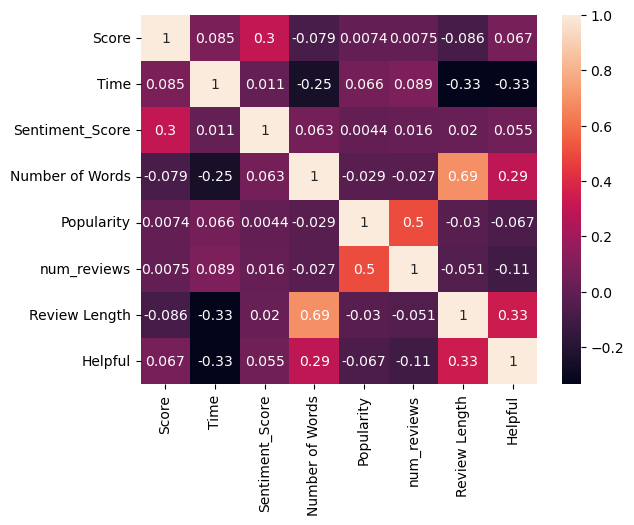

In [91]:
import seaborn as sns

# calculate the correlations
correlations = df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

print(df.corr())